# Data Exploration

## Overview
Explore the transaction dataset, check data quality, and understand distributions.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# For better display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [ ]:
# Load the preprocessed data
try:
    df = pd.read_csv('../data/raw/mapped_query.csv')
    print(f"✅ Data loaded successfully! Shape: {df.shape}")
except FileNotFoundError:
    # If preprocessed file doesn't exist, use the raw data
    print("⚠️ Preprocessed file not found. Loading raw data...")
    df = pd.read_csv('../data/raw/mapped_query.csv')
    print(f"✅ Raw data loaded! Shape: {df.shape}")

# Display first few rows
print("\n📋 First 5 rows:")
display(df.head())

✅ Data loaded successfully! Shape: (1304801, 15)

📋 First 5 rows:


,Account_Number,Customer_Branch_Code,End_of_Month,Current_Balance_LCY,Transaction_Amount,Last_Debit_Transaction_Date,Last_Credit_Transaction_Date,Transaction_Channel_Name,Total_Transaction_Count,Debit_Credit_Flag,Channel,Longitude,Latitude,Community,Region
0,2045317750241665,1,202501,1848748,515500.00,2025-02-03 00:00:00.000,2025-01-31 00:00:00.000,MISTRALUSER,1.00,D,RIDGE TOWER,5.56,-0.20,Accra,Greater Accra Region
1,2045317750241665,1,202501,1848748,113410.00,2025-02-03 00:00:00.000,2025-01-31 00:00:00.000,GAKRONG,1.00,D,RIDGE TOWER,5.56,-0.20,Accra,Greater Accra Region
2,2045317750241665,1,202501,1848748,29539181.00,2025-02-03 00:00:00.000,2025-01-31 00:00:00.000,MOFFEI,1.00,C,RIDGE TOWER,5.56,-0.20,Accra,Greater Accra Region
3,2045317750241665,1,202501,1848748,343612.00,2025-02-03 00:00:00.000,2025-01-31 00:00:00.000,ATMUSER,2.00,D,RIDGE TOWER,5.56,-0.20,Accra,Greater Accra Region
4,2045317750241665,1,202501,1848748,103100000.00,2025-02-03 00:00:00.000,2025-01-31 00:00:00.000,AKUWORNU,1.00,C,RIDGE TOWER,5.56,-0.20,Accra,Greater Accra Region


In [44]:
# %%
print("\n📊 Dataset Information:")
print("="*60)
print(f"Total records: {df.shape[0]:,}")
print(f"Total columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


📊 Dataset Information:
Total records: 1,304,801
Total columns: 18
Memory usage: 909.65 MB


Data Quality Assessment

In [45]:
# %%
print("🔍 DATA QUALITY CHECK")
print("="*60)

# Check data types
print("📝 Data Types:")
print(df.dtypes)
print("\n" + "="*60)

🔍 DATA QUALITY CHECK
📝 Data Types:
Account_Number                    int64
Customer_Branch_Code              int64
End_of_Month                      int64
Current_Balance_LCY               int64
Transaction_Amount              float64
Last_Debit_Transaction_Date      object
Last_Credit_Transaction_Date     object
Transaction_Channel_Name         object
Total_Transaction_Count         float64
Debit_Credit_Flag                object
Channel                          object
Longitude                       float64
Latitude                        float64
Community                        object
Region                           object
longitude                        object
latitude                         object
branch                           object
dtype: object



In [ ]:
# Convert date columns to datetime format
date_columns = ['End_of_Month', 'Last_Debit_Transaction_Date', 'Last_Credit_Transaction_Date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"Converted {col} to datetime")

Converted End_of_Month to datetime
Converted Last_Debit_Transaction_Date to datetime
Converted Last_Credit_Transaction_Date to datetime


In [ ]:
# Check for missing values
print("\n🔎 MISSING VALUES ANALYSIS")
print("="*60)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Values': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).values,
    'Data_Type': df.dtypes.values
})

# Sort by missing percentage
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)

# Display missing values summary
display(missing_data.style.background_gradient(subset=['Missing_Percentage'], cmap='Reds'))


🔎 MISSING VALUES ANALYSIS


,Column,Missing_Values,Missing_Percentage,Data_Type
12,Latitude,475403,36.434905,float64
13,Community,475403,36.434905,object
10,Channel,475403,36.434905,object
14,Region,475403,36.434905,object
11,Longitude,475403,36.434905,float64
4,Transaction_Amount,5423,0.415619,float64
7,Transaction_Channel_Name,5423,0.415619,object
9,Debit_Credit_Flag,5423,0.415619,object
8,Total_Transaction_Count,5423,0.415619,float64
0,Account_Number,0,0.000000,int64


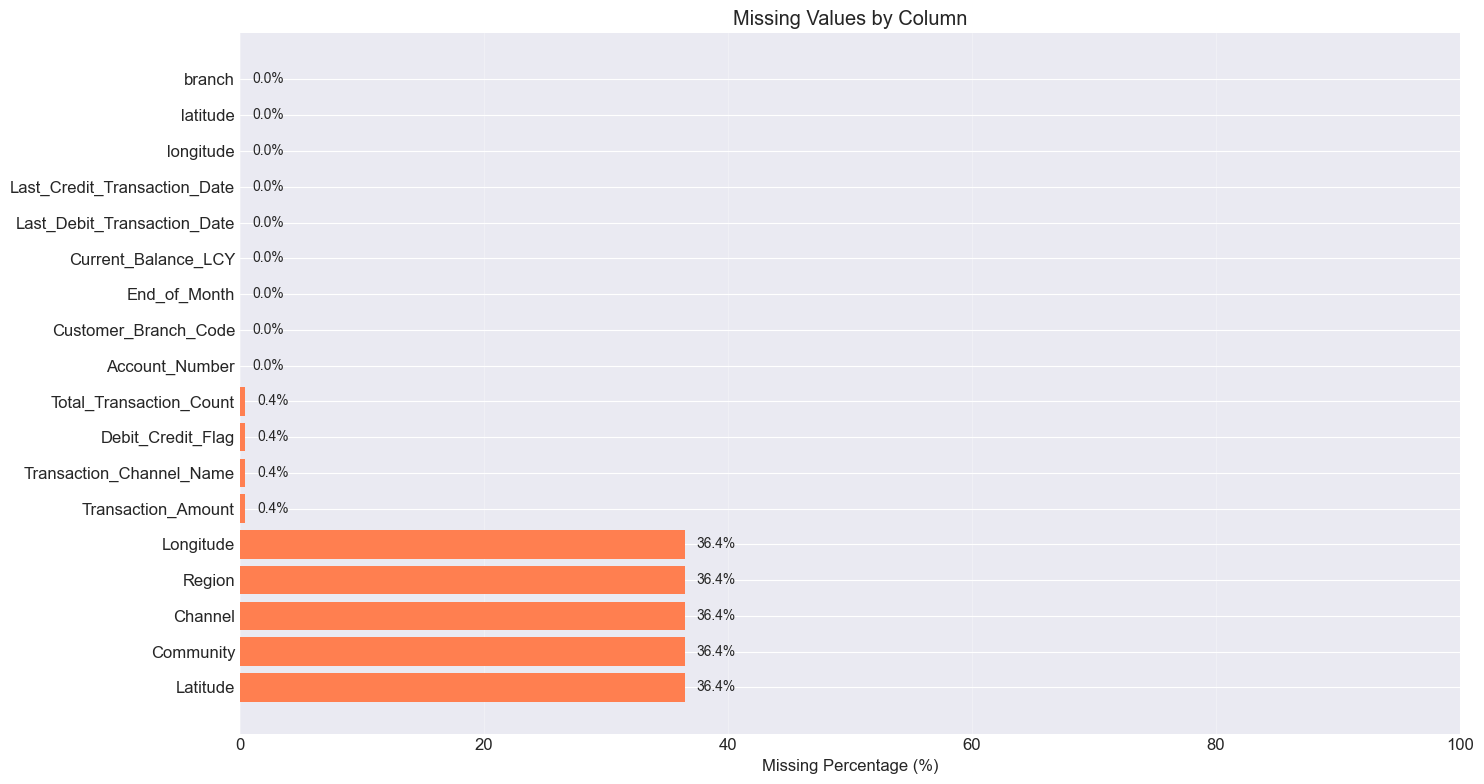

In [ ]:
# Visualize missing values
plt.figure(figsize=(15, 8))
bars = plt.barh(missing_data['Column'], missing_data['Missing_Percentage'], color='coral')
plt.xlabel('Missing Percentage (%)')
plt.title('Missing Values by Column')
plt.xlim(0, 100)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Check for duplicate records
print(f"\n🔍 DUPLICATE RECORDS: {df.duplicated().sum():,} out of {len(df):,}")
print(f"Duplicate percentage: {(df.duplicated().sum() / len(df) * 100):.2f}%")


🔍 DUPLICATE RECORDS: 498,433 out of 1,304,801
Duplicate percentage: 38.20%


In [ ]:
print("📊 STATISTICAL SUMMARY")
print("="*60)

# Generate comprehensive statistical summary
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"\n📈 Numeric Columns ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"  • {col}")

print(f"\n📝 Categorical Columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  • {col}")

📊 STATISTICAL SUMMARY

📈 Numeric Columns (7):
  • Account_Number
  • Customer_Branch_Code
  • Current_Balance_LCY
  • Transaction_Amount
  • Total_Transaction_Count
  • Longitude
  • Latitude

📝 Categorical Columns (8):
  • Transaction_Channel_Name
  • Debit_Credit_Flag
  • Channel
  • Community
  • Region
  • longitude
  • latitude
  • branch


In [ ]:
# Detailed numeric statistics
print("\n📊 NUMERIC FEATURES STATISTICS")
print("="*60)

numeric_stats = df[numeric_cols].describe().T
numeric_stats['IQR'] = numeric_stats['75%'] - numeric_stats['25%']
numeric_stats['CV'] = (numeric_stats['std'] / numeric_stats['mean']).abs() * 100  # Coefficient of Variation
numeric_stats['Missing'] = df[numeric_cols].isnull().sum().values
numeric_stats['Missing_Pct'] = (df[numeric_cols].isnull().sum() / len(df) * 100).values

display(numeric_stats.style.background_gradient(subset=['mean', 'std', 'CV'], cmap='YlOrRd'))


📊 NUMERIC FEATURES STATISTICS


,count,mean,std,min,25%,50%,75%,max,IQR,CV,Missing,Missing_Pct
Account_Number,1304801.000000,3984582746932443.000000,743869926712727.625000,2045317750241665.000000,4110767857155640.000000,4231629300066790.000000,4252645978634290.000000,5590632663565240.000000,141878121478650.000000,18.668703,0,0.000000
Customer_Branch_Code,1304801.000000,184.500926,244.824421,1.000000,21.000000,83.000000,201.000000,901.000000,180.000000,132.695497,0,0.000000
Current_Balance_LCY,1304801.000000,19404599.801452,86920267.408221,1031.000000,7918.000000,177456.000000,3207441.000000,3099919361.000000,3199523.000000,447.936408,0,0.000000
Transaction_Amount,1299378.000000,14731847.372438,125481475.141429,-266451949.000000,423.000000,20620.000000,1031000.000000,6078843840.000000,1030577.000000,851.770127,5423,0.415619
Total_Transaction_Count,1299378.000000,3.601181,9.266763,1.000000,1.000000,1.000000,3.000000,275.000000,2.000000,257.325642,5423,0.415619
Longitude,829398.000000,6.068686,0.958391,4.893004,5.559677,5.634733,6.655563,10.785438,1.095886,15.792397,475403,36.434905
Latitude,829398.000000,-0.665850,0.754086,-2.999437,-1.575813,-0.212083,-0.181855,0.027829,1.393957,113.251683,475403,36.434905


In [ ]:
# Detailed categorical statistics
print("\n📊 CATEGORICAL FEATURES STATISTICS")
print("="*60)

categorical_stats = []
for col in categorical_cols:
    unique_count = df[col].nunique()
    top_value = df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'
    top_freq = (df[col] == top_value).sum() if top_value != 'N/A' else 0
    top_pct = (top_freq / len(df) * 100) if top_value != 'N/A' else 0
    
    categorical_stats.append({
        'Column': col,
        'Unique_Count': unique_count,
        'Top_Value': str(top_value)[:50],  # Truncate long strings
        'Top_Frequency': top_freq,
        'Top_Percentage': f"{top_pct:.1f}%",
        'Missing_Values': df[col].isnull().sum()
    })

categorical_df = pd.DataFrame(categorical_stats)
display(categorical_df.style.background_gradient(subset=['Unique_Count'], cmap='Blues'))


📊 CATEGORICAL FEATURES STATISTICS


,Column,Unique_Count,Top_Value,Top_Frequency,Top_Percentage,Missing_Values
0,Transaction_Channel_Name,542,SYSTEM,543798,41.7%,5423
1,Debit_Credit_Flag,2,C,700400,53.7%,5423
2,Channel,81,RIDGE TOWER,108154,8.3%,475403
3,Community,45,Osu Klottey,111376,8.5%,475403
4,Region,13,Greater Accra Region,532399,40.8%,475403
5,longitude,85,-0.2137618,405086,31.0%,0
6,latitude,85,5.5631787,405086,31.0%,0
7,branch,92,MTN GHANA HQ - YELLOSAVE MTN,247024,18.9%,0


📈 DISTRIBUTION ANALYSIS


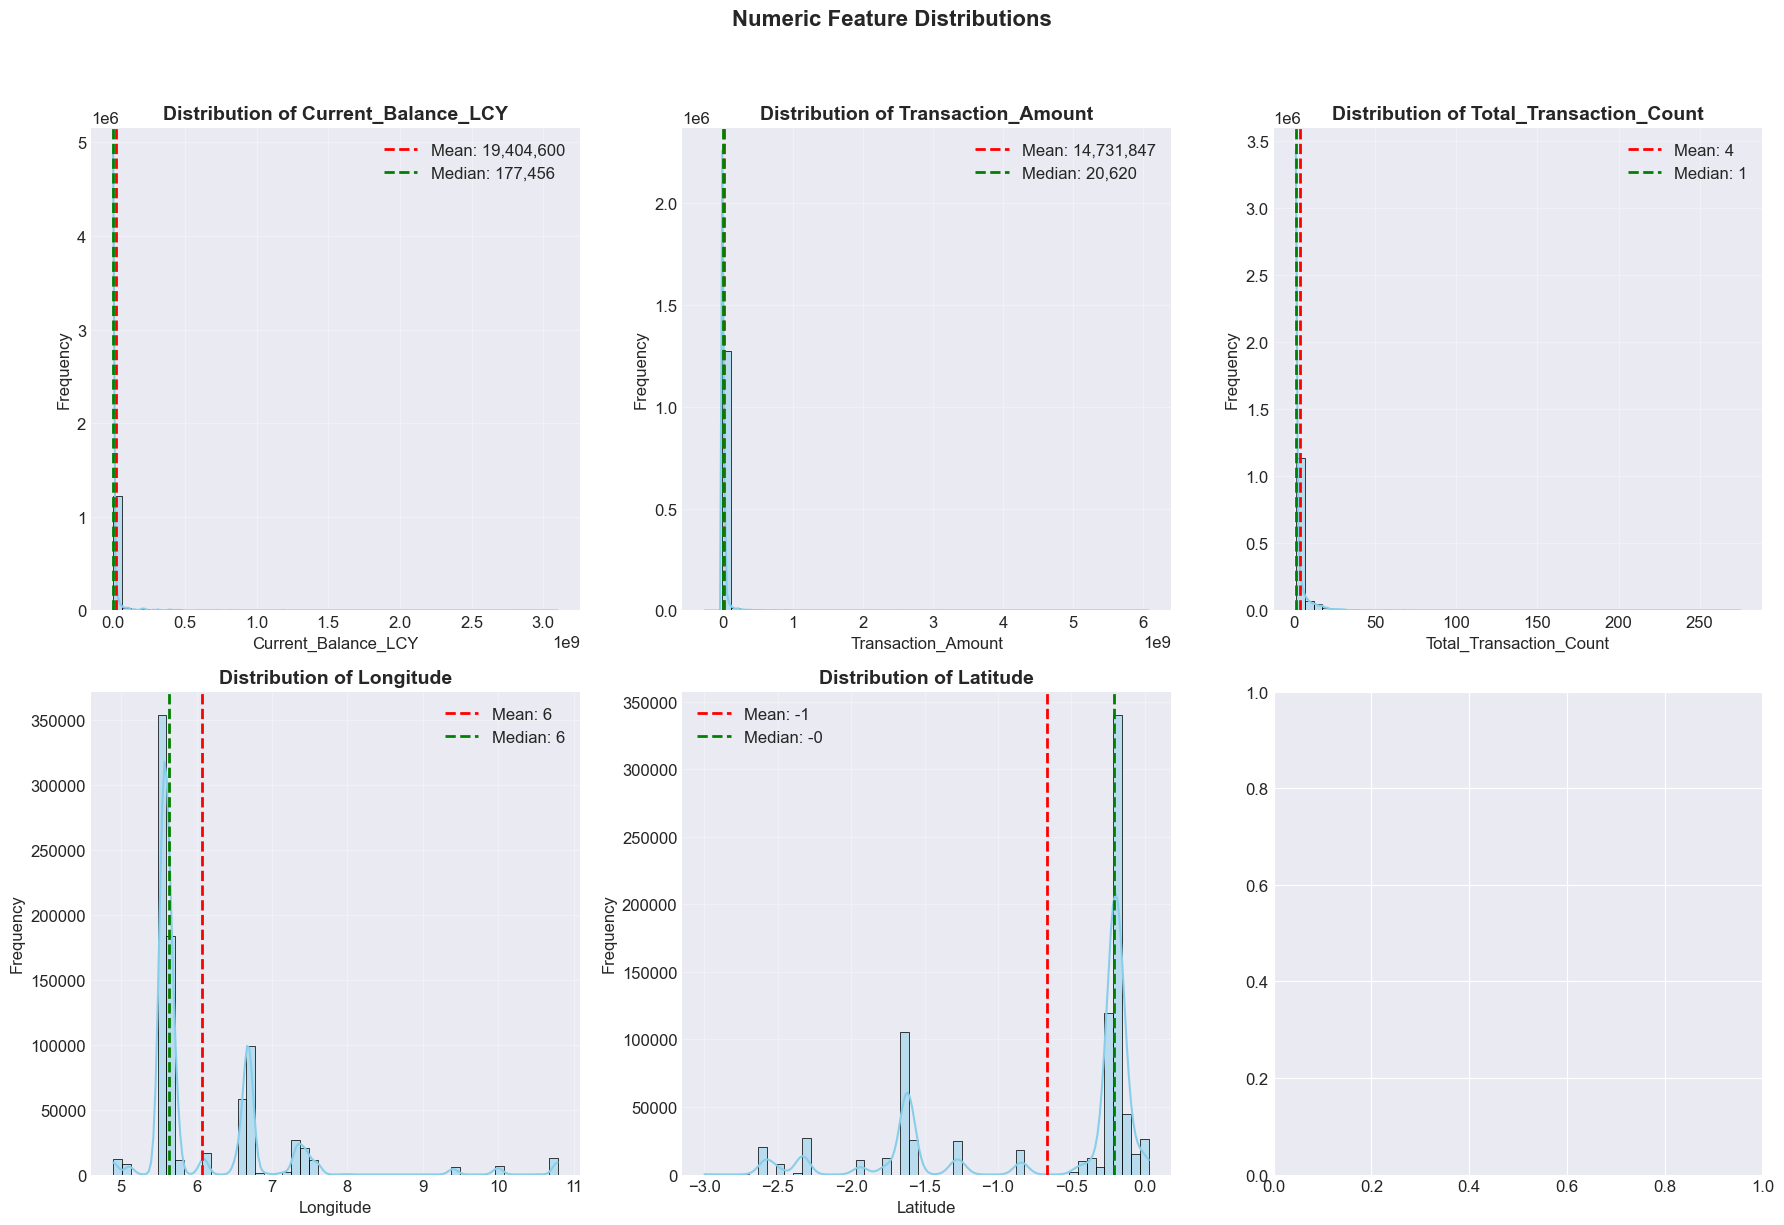

In [ ]:
print("📈 DISTRIBUTION ANALYSIS")
print("="*60)

# Create subplot for numeric distributions
numeric_to_plot = [col for col in numeric_cols if col not in ['Account_Number', 'Customer_Branch_Code']]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numeric_to_plot[:6]):  # Plot first 6 numeric columns
    ax = axes[idx]
    
    # Histogram with KDE
    sns.histplot(df[col].dropna(), kde=True, ax=ax, bins=50, color='skyblue', edgecolor='black')
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:,.0f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:,.0f}')
    
    ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Numeric Feature Distributions', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

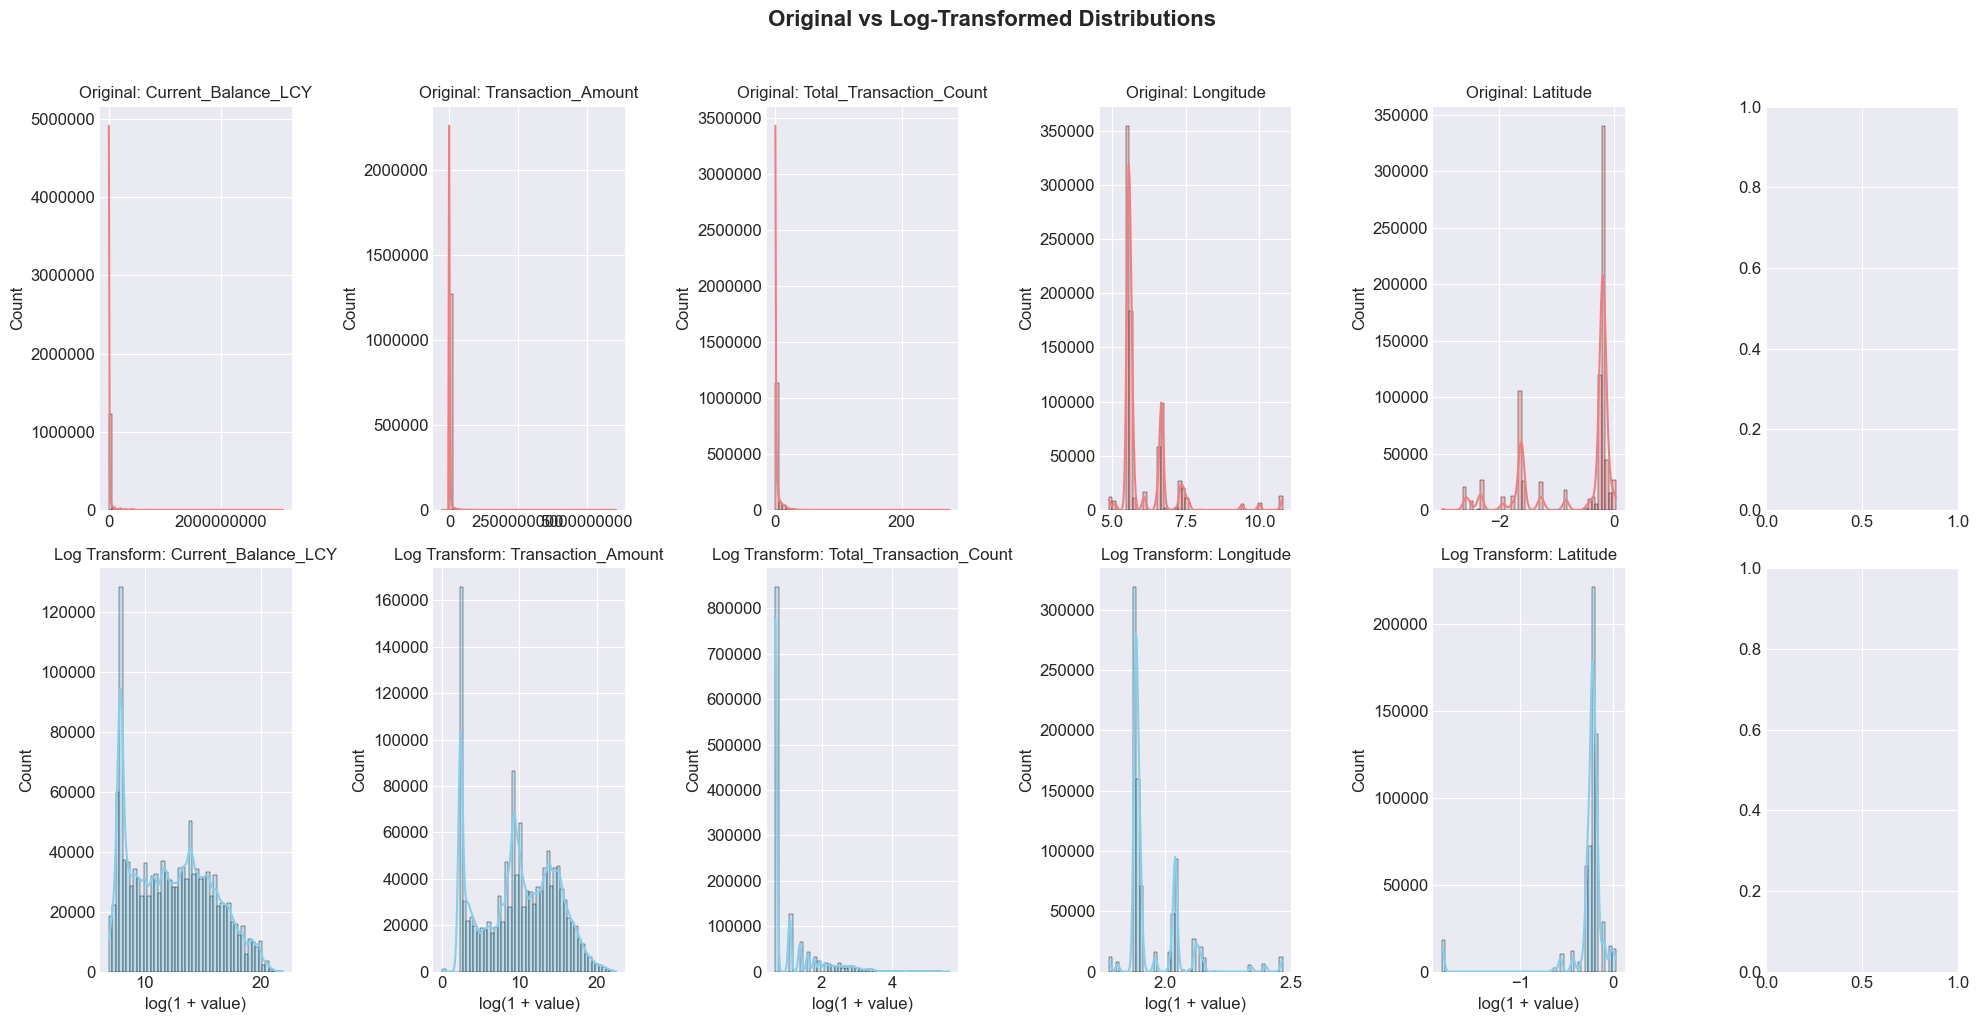

In [54]:
fig, axes = plt.subplots(2, 6, figsize=(20, 10))

for idx, col in enumerate(numeric_to_plot[:6]):
    # Original distribution
    ax1 = axes[0, idx]
    sns.histplot(df[col].dropna(), kde=True, ax=ax1, bins=50, 
                 color='lightcoral', edgecolor='black')
    ax1.set_title(f'Original: {col}', fontsize=12)
    ax1.set_xlabel('')
    ax1.ticklabel_format(style='plain')
    
    # Log distribution
    ax2 = axes[1, idx]
    log_data = np.log1p(df[col].dropna())
    sns.histplot(log_data, kde=True, ax=ax2, bins=50, 
                 color='skyblue', edgecolor='black')
    ax2.set_title(f'Log Transform: {col}', fontsize=12)
    ax2.set_xlabel('log(1 + value)')

plt.suptitle('Original vs Log-Transformed Distributions', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [55]:
from ipywidgets import interact, FloatSlider

@interact
def plot_log_transform(column=numeric_to_plot[:6], 
                       log_scale=True,
                       bins=(20, 100, 10)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Original
    data = df[column].dropna()
    sns.histplot(data, bins=bins, kde=True, ax=ax1, color='lightcoral')
    ax1.set_title(f'Original: {column}')
    ax1.set_xlabel('Value')
    
    # With log transformation
    if log_scale:
        transformed = np.log1p(data)
        xlabel = f'log(1 + {column})'
    else:
        transformed = data
        xlabel = column
    
    sns.histplot(transformed, bins=bins, kde=True, ax=ax2, color='skyblue')
    ax2.set_title(f'Transformed: {column}')
    ax2.set_xlabel(xlabel)
    
    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='column', options=('Current_Balance_LCY', 'Transaction_Amount', 'To…

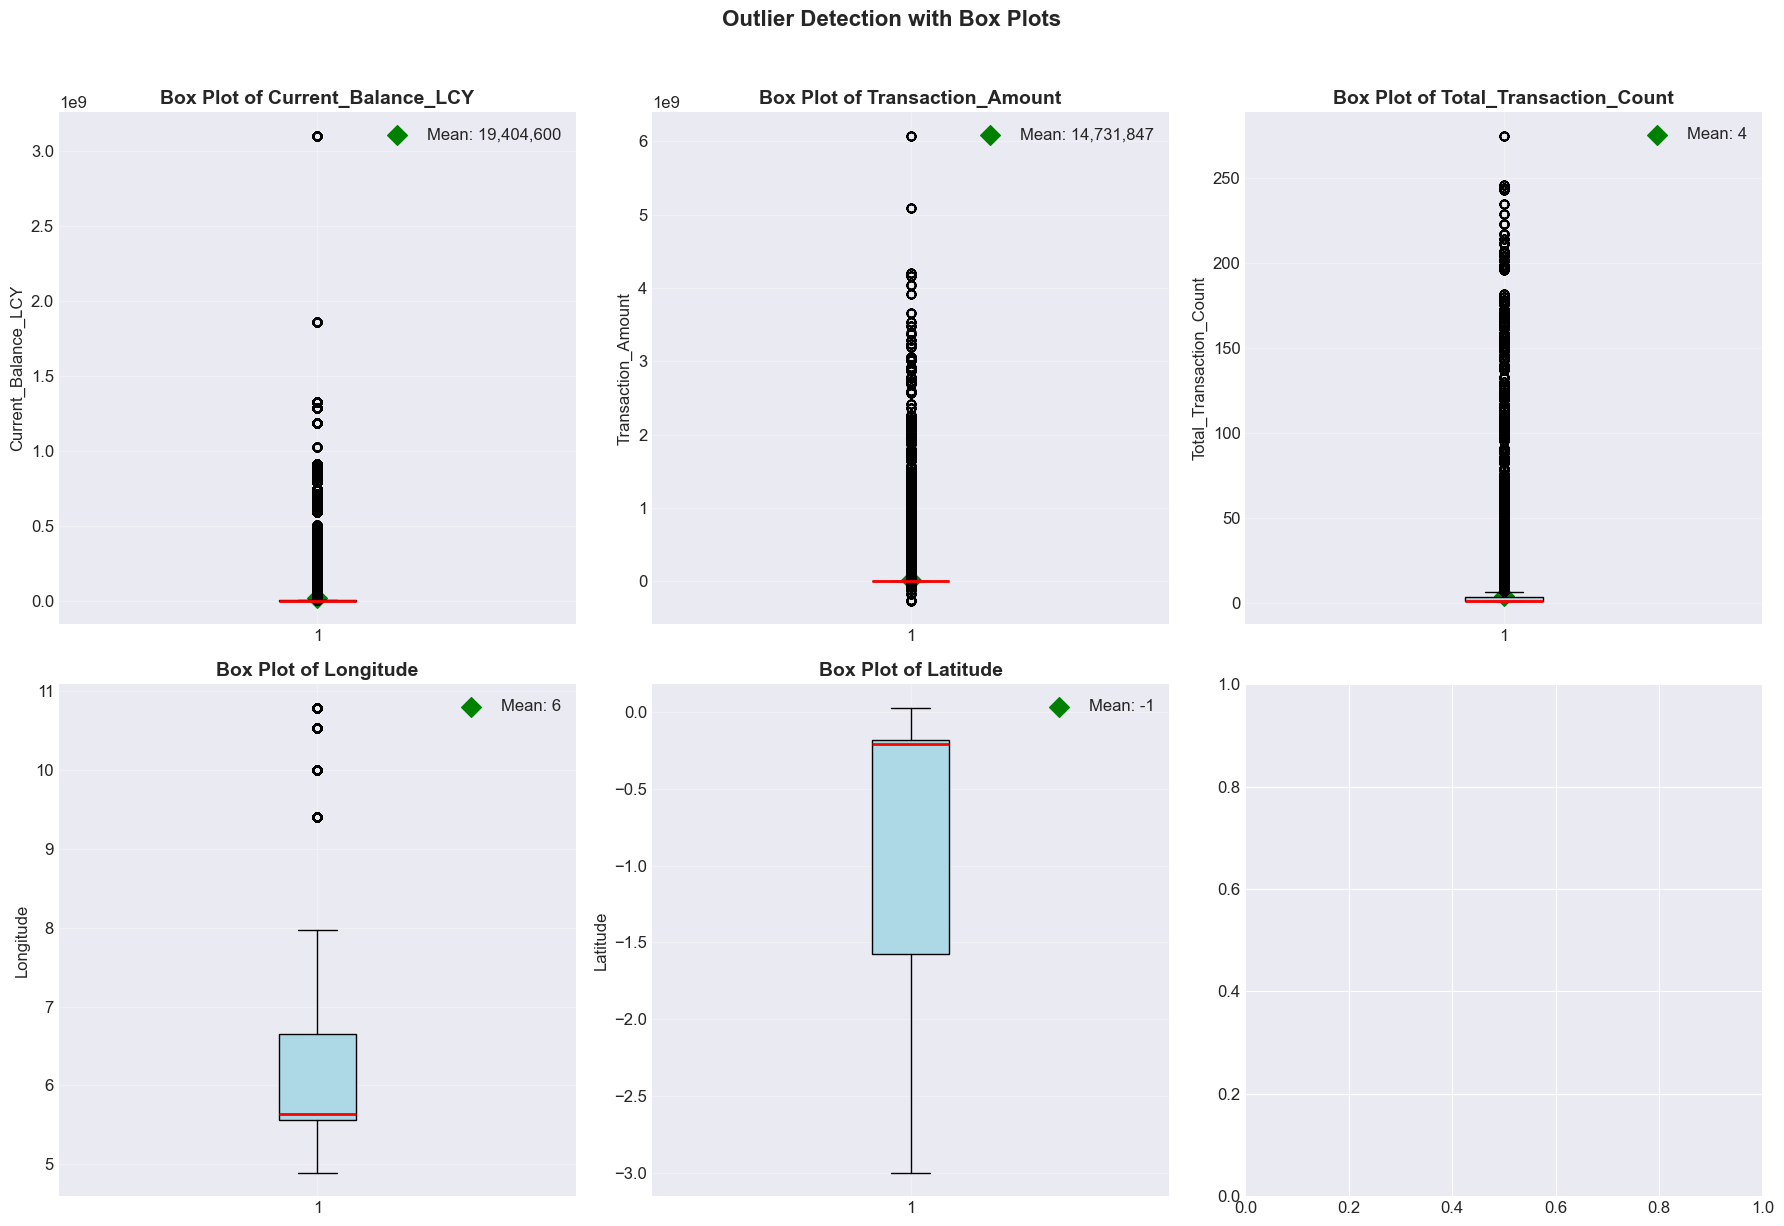

In [ ]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numeric_to_plot[:6]):
    ax = axes[idx]
    
    # Box plot
    box = ax.boxplot(df[col].dropna(), patch_artist=True, vert=True)
    
    # Customize box plot
    box['boxes'][0].set_facecolor('lightblue')
    box['medians'][0].set_color('red')
    box['medians'][0].set_linewidth(2)
    
    # Add mean marker
    mean_val = df[col].mean()
    ax.scatter(1, mean_val, color='green', s=100, marker='D', label=f'Mean: {mean_val:,.0f}')
    
    ax.set_title(f'Box Plot of {col}', fontsize=14, fontweight='bold')
    ax.set_ylabel(col)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Outlier Detection with Box Plots', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

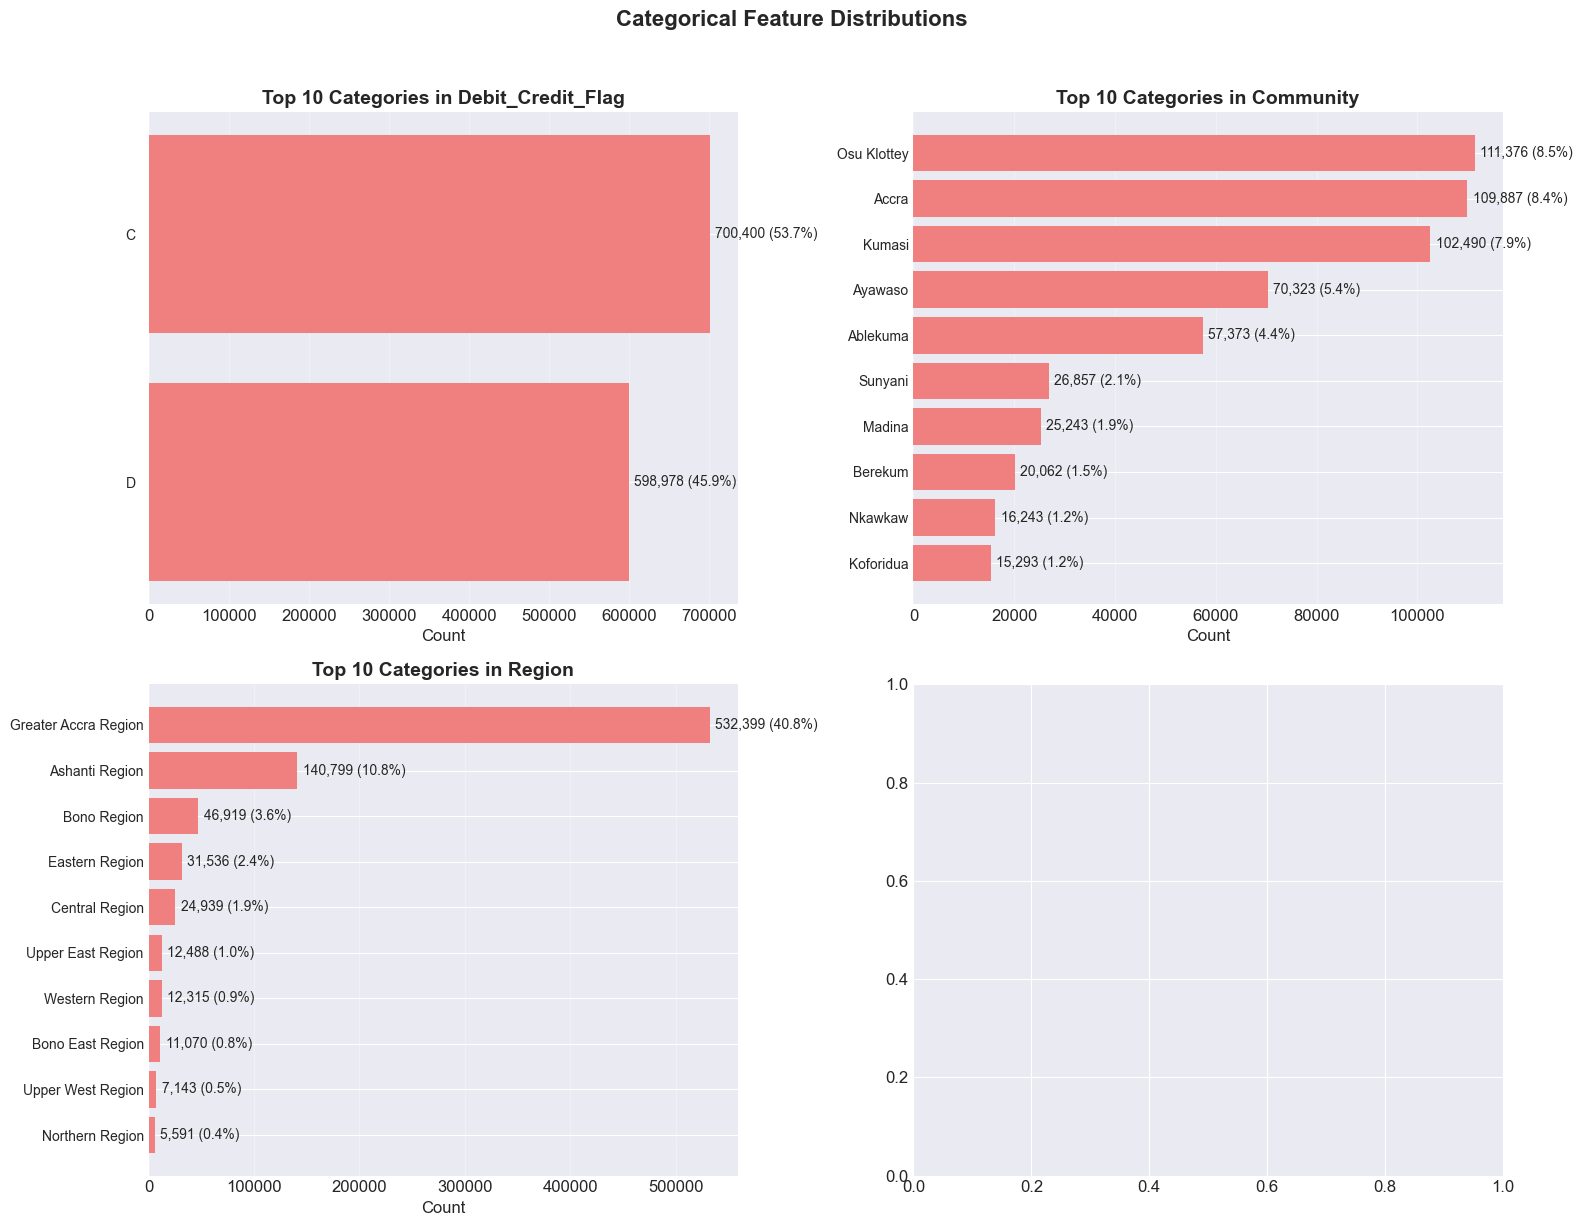

In [ ]:
# Categorical distributions (top 10 for each)
categorical_to_plot = [col for col in categorical_cols if df[col].nunique() > 1 and df[col].nunique() <= 50]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_to_plot[:4]):
    ax = axes[idx]
    
    # Get top 10 categories
    top_categories = df[col].value_counts().nlargest(10)
    
    # Create bar plot
    bars = ax.barh(range(len(top_categories)), top_categories.values, color='lightcoral')
    
    # Add value labels
    for i, (value, bar) in enumerate(zip(top_categories.values, bars)):
        ax.text(value + max(top_categories.values) * 0.01, bar.get_y() + bar.get_height()/2,
                f'{value:,} ({value/len(df)*100:.1f}%)', va='center', fontsize=10)
    
    ax.set_yticks(range(len(top_categories)))
    ax.set_yticklabels(top_categories.index, fontsize=10)
    ax.set_xlabel('Count')
    ax.set_title(f'Top 10 Categories in {col}', fontsize=14, fontweight='bold')
    ax.invert_yaxis()  # Highest on top
    ax.grid(True, alpha=0.3, axis='x')

plt.suptitle('Categorical Feature Distributions', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Transaction-Specific Analysis

In [ ]:
print("💳 TRANSACTION ANALYSIS")
print("="*60)

# Create Transaction_Date if not present
if 'Transaction_Date' not in df.columns:
    df['Transaction_Date'] = df['Last_Debit_Transaction_Date']
    print("Created Transaction_Date from Last_Debit_Transaction_Date")

# Extract date components for temporal analysis
df['Transaction_Year'] = df['Transaction_Date'].dt.year
df['Transaction_Month'] = df['Transaction_Date'].dt.month
df['Transaction_Day'] = df['Transaction_Date'].dt.day
df['Transaction_Weekday'] = df['Transaction_Date'].dt.day_name()
df['Transaction_Hour'] = df['Transaction_Date'].dt.hour

💳 TRANSACTION ANALYSIS
Created Transaction_Date from Last_Debit_Transaction_Date



💰 DEBIT vs CREDIT ANALYSIS


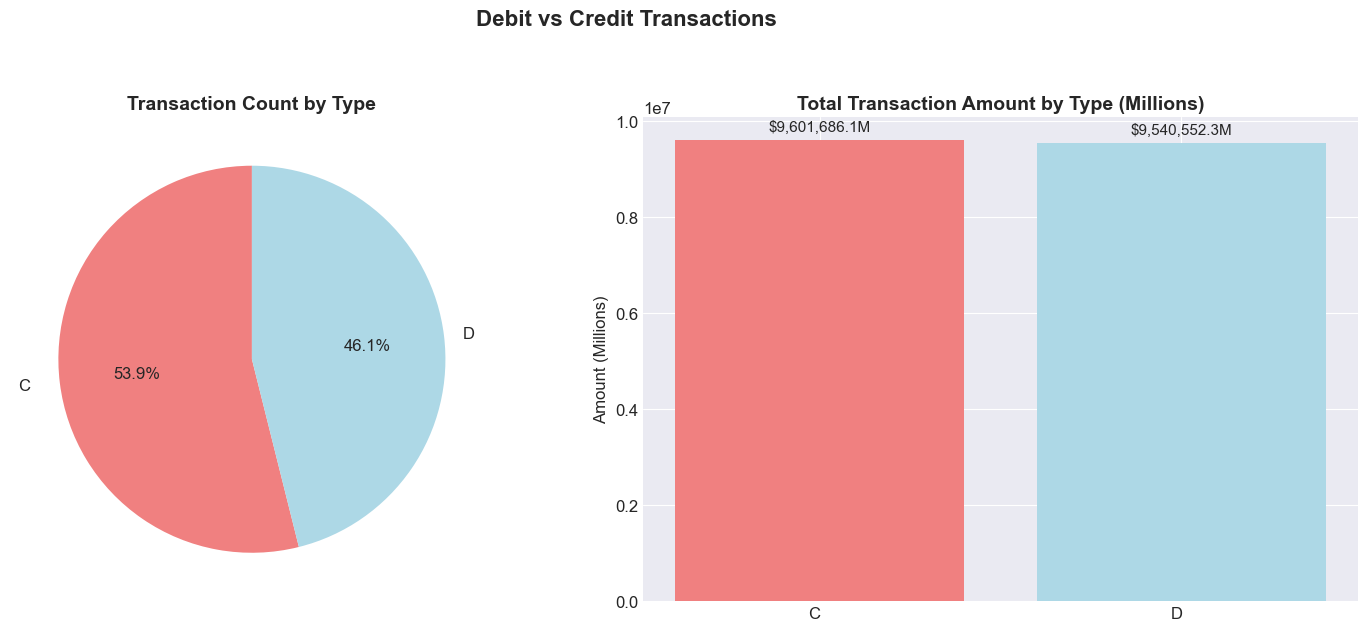


📊 Transaction Statistics:


,sum,mean,count
Debit_Credit_Flag,,,
C,9601686058759.00,13708860.73,700400
D,9540552316345.00,15928051.31,598978


In [ ]:
# Debit vs Credit Analysis
print("\n💰 DEBIT vs CREDIT ANALYSIS")
if 'Debit_Credit_Flag' in df.columns:
    debit_credit_counts = df['Debit_Credit_Flag'].value_counts()
    debit_credit_amounts = df.groupby('Debit_Credit_Flag')['Transaction_Amount'].agg(['sum', 'mean', 'count'])
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Count plot
    axes[0].pie(debit_credit_counts.values, labels=debit_credit_counts.index, 
                autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
    axes[0].set_title('Transaction Count by Type', fontsize=14, fontweight='bold')
    
    # Amount plot
    axes[1].bar(debit_credit_amounts.index, debit_credit_amounts['sum'] / 1e6, 
                color=['lightcoral', 'lightblue'])
    axes[1].set_title('Total Transaction Amount by Type (Millions)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Amount (Millions)')
    
    # Add value labels
    for i, value in enumerate(debit_credit_amounts['sum'] / 1e6):
        axes[1].text(i, value + max(debit_credit_amounts['sum'] / 1e6) * 0.02, 
                    f'${value:,.1f}M', ha='center', fontsize=11)
    
    plt.suptitle('Debit vs Credit Transactions', fontsize=16, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()
    
    # Display statistics
    print("\n📊 Transaction Statistics:")
    display(debit_credit_amounts)


🏦 TRANSACTION CHANNEL ANALYSIS
Total unique channels: 542

📋 Top 10 Channels by Transaction Count:


,Transaction_Count,Total_Amount,Avg_Amount,Std_Amount,Unique_Customers
Transaction_Channel_Name,,,,,
SYSTEM,543798,856061163567.00,1574226.39,29717298.32,3135
MISTRALUSER,176325,719508050856.00,4080578.77,18872257.59,765
YSAVEUSER,109922,91594096235.00,833264.46,2183632.46,1139
ATMUSER,62457,342210103647.00,5479131.30,17779103.54,442
NSANOUSER,57958,50577083328.00,872650.60,2719175.83,333
ICIUSER,40192,587052431.00,14606.20,7719.44,416
DDIUSER,31139,11930114690.00,383124.53,951132.76,226
AMSUSER,28054,7209741052546.00,256995118.43,645233547.56,480
GIPUSER,18205,248872901397.00,13670579.59,69955089.55,467


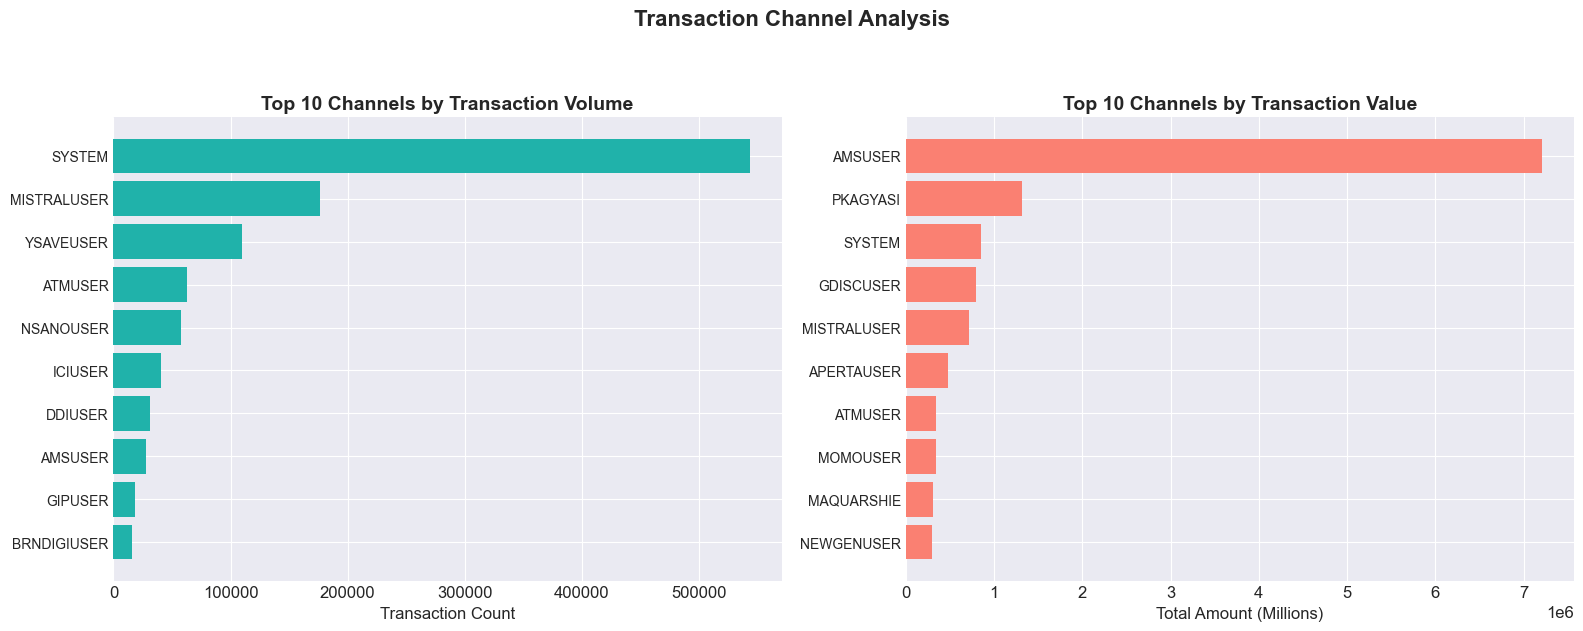

In [ ]:
# Channel Analysis
print("\n🏦 TRANSACTION CHANNEL ANALYSIS")
if 'Transaction_Channel_Name' in df.columns:
    channel_stats = df.groupby('Transaction_Channel_Name').agg({
        'Transaction_Amount': ['count', 'sum', 'mean', 'std'],
        'Account_Number': 'nunique'
    }).round(2)
    
    channel_stats.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Std_Amount', 'Unique_Customers']
    channel_stats = channel_stats.sort_values('Transaction_Count', ascending=False)
    
    print(f"Total unique channels: {len(channel_stats)}")
    print("\n📋 Top 10 Channels by Transaction Count:")
    display(channel_stats.head(10))
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Top channels by count
    top_channels = channel_stats.head(10)
    axes[0].barh(range(len(top_channels)), top_channels['Transaction_Count'], color='lightseagreen')
    axes[0].set_yticks(range(len(top_channels)))
    axes[0].set_yticklabels(top_channels.index, fontsize=10)
    axes[0].set_xlabel('Transaction Count')
    axes[0].set_title('Top 10 Channels by Transaction Volume', fontsize=14, fontweight='bold')
    axes[0].invert_yaxis()
    
    # Top channels by amount
    top_channels_amount = channel_stats.sort_values('Total_Amount', ascending=False).head(10)
    axes[1].barh(range(len(top_channels_amount)), top_channels_amount['Total_Amount'] / 1e6, color='salmon')
    axes[1].set_yticks(range(len(top_channels_amount)))
    axes[1].set_yticklabels(top_channels_amount.index, fontsize=10)
    axes[1].set_xlabel('Total Amount (Millions)')
    axes[1].set_title('Top 10 Channels by Transaction Value', fontsize=14, fontweight='bold')
    axes[1].invert_yaxis()
    
    plt.suptitle('Transaction Channel Analysis', fontsize=16, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()

Customer Behavior Analysis

In [ ]:
print("👤 CUSTOMER BEHAVIOR ANALYSIS")
print("="*60)

# Customer-level statistics
if 'Account_Number' in df.columns:
    customer_stats = df.groupby('Account_Number').agg({
        'Transaction_Amount': ['count', 'sum', 'mean', 'std', 'min', 'max'],
        'Transaction_Channel_Name': lambda x: x.nunique(),
        'Customer_Branch_Code': lambda x: x.nunique(),
        'Transaction_Date': ['min', 'max']
    }).round(2)
    
    # Flatten column names
    customer_stats.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Std_Amount',
                             'Min_Amount', 'Max_Amount', 'Unique_Channels', 'Unique_Branches',
                             'First_Transaction', 'Last_Transaction']
    
    # Calculate customer lifetime
    customer_stats['Customer_Lifetime_Days'] = (customer_stats['Last_Transaction'] - 
                                               customer_stats['First_Transaction']).dt.days
    
    print(f"📊 Total unique customers: {len(customer_stats):,}")
    print("\n📋 Customer Statistics Summary:")
    display(customer_stats.describe().style.background_gradient(cmap='YlOrRd'))

👤 CUSTOMER BEHAVIOR ANALYSIS
📊 Total unique customers: 3,893

📋 Customer Statistics Summary:


,Transaction_Count,Total_Amount,Avg_Amount,Std_Amount,Min_Amount,Max_Amount,Unique_Channels,Unique_Branches,First_Transaction,Last_Transaction,Customer_Lifetime_Days
count,3893.000000,3893.000000,3381.000000,3358.000000,3381.000000,3381.000000,3893.000000,3893.000000,3893,3893,3893.000000
mean,333.772926,4917091799.410223,3071394.347400,6152096.340625,-423497.077196,32673890.856847,3.997431,1.000000,1961-11-29 00:30:19.881839168,1974-10-21 20:36:33.475468768,4709.837657
min,0.000000,-339999.000000,-30909.000000,0.000000,-266451949.000000,-30909.000000,0.000000,1.000000,1800-01-01 00:00:00,1800-01-01 00:00:00,0.000000
25%,32.000000,2420.000000,215.200000,5.965000,10.000000,2062.000000,1.000000,1.000000,1800-01-01 00:00:00,2018-09-04 00:00:00,0.000000
50%,242.000000,2268406.000000,94655.170000,143407.670000,21.000000,484570.000000,2.000000,1.000000,2023-06-05 00:00:00,2024-07-31 00:00:00,0.000000
75%,319.000000,108732045.000000,663197.360000,1136845.505000,196.000000,4459075.000000,4.000000,1.000000,2025-01-27 00:00:00,2025-09-30 00:00:00,245.000000
max,9141.000000,2598943371882.000000,527512202.400000,987382977.760000,1546500.000000,6078843840.000000,74.000000,1.000000,2025-11-03 00:00:00,2025-11-03 00:00:00,82486.000000
std,638.200630,74737884569.743958,23970066.914243,45645504.337167,8276117.694949,245990950.675008,6.301030,0.000000,nan,nan,18933.070302


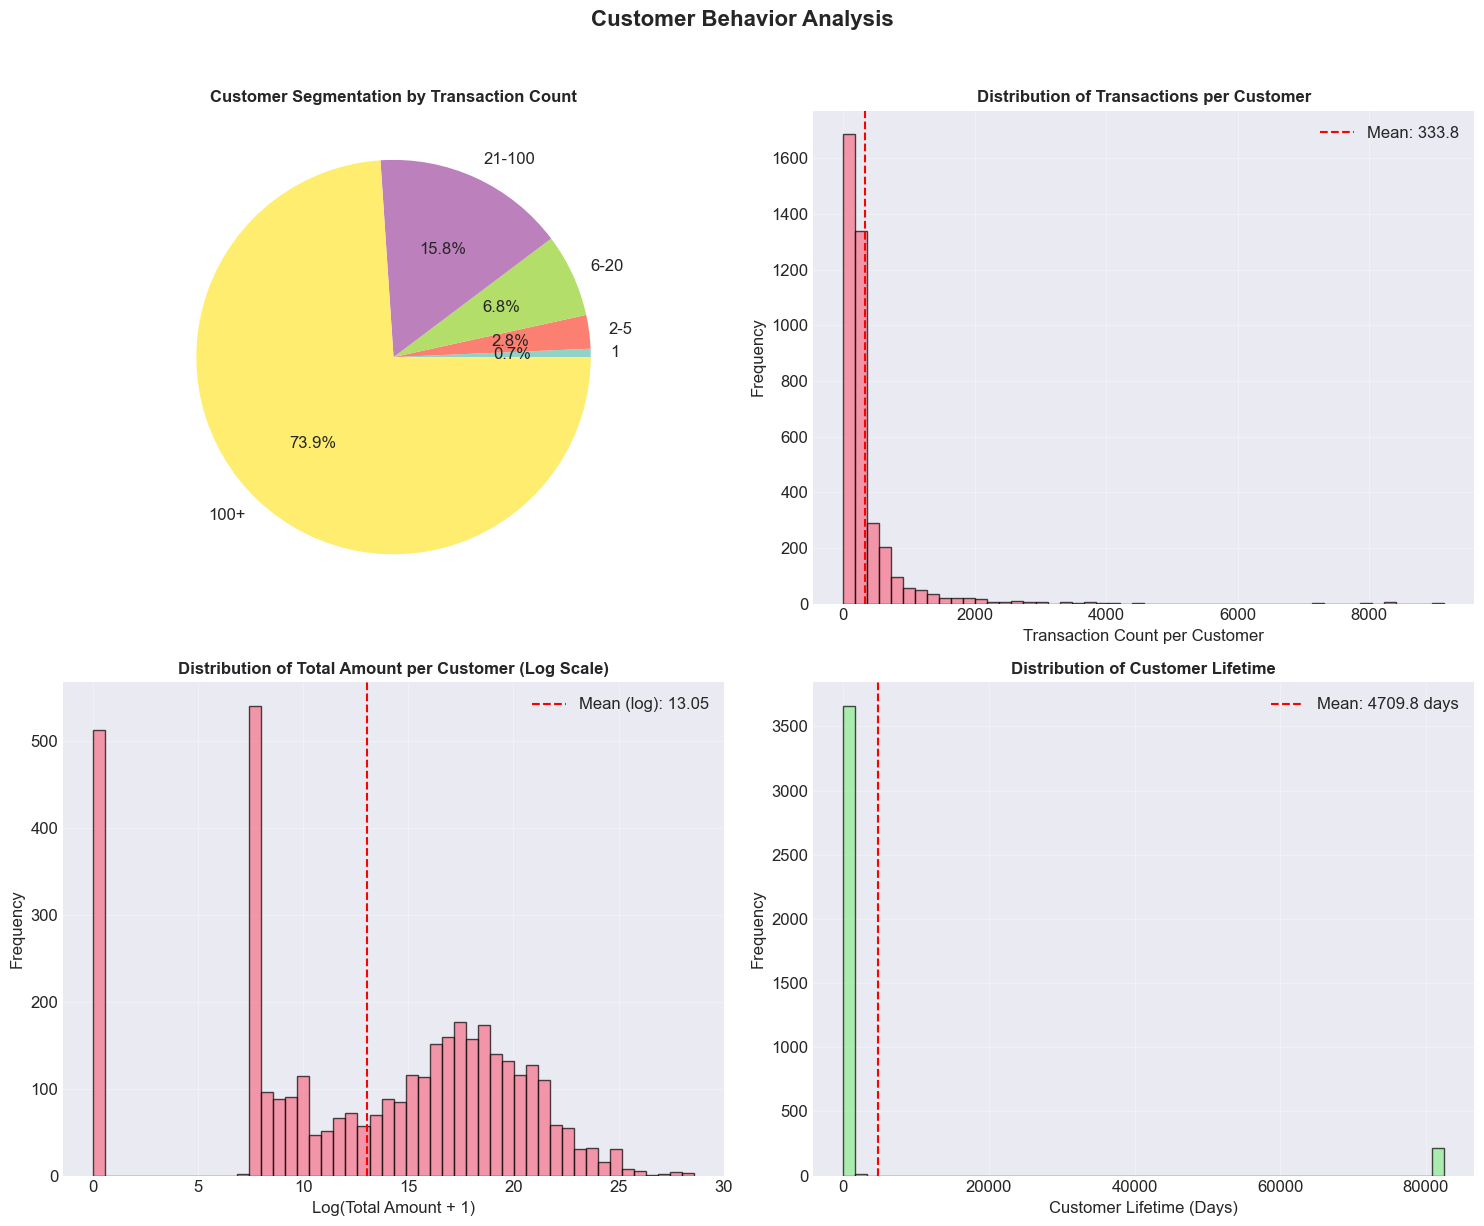

In [ ]:
# Customer segmentation by transaction count
transaction_segments = pd.cut(customer_stats['Transaction_Count'], 
                                  bins=[0, 1, 5, 20, 100, float('inf')],
                                  labels=['1', '2-5', '6-20', '21-100', '100+'])
    
segment_summary = transaction_segments.value_counts().sort_index()
    
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Segment distribution
axes[0,0].pie(segment_summary.values, labels=segment_summary.index, autopct='%1.1f%%',
                  colors=plt.cm.Set3(np.linspace(0, 1, len(segment_summary))))
axes[0,0].set_title('Customer Segmentation by Transaction Count', fontsize=12, fontweight='bold')
    
# Transaction count distribution
axes[0,1].hist(customer_stats['Transaction_Count'], bins=50, edgecolor='black', alpha=0.7)
axes[0,1].axvline(customer_stats['Transaction_Count'].mean(), color='red', linestyle='--', 
                     label=f'Mean: {customer_stats["Transaction_Count"].mean():.1f}')
axes[0,1].set_xlabel('Transaction Count per Customer')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of Transactions per Customer', fontsize=12, fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)
    
# Total amount distribution
axes[1,0].hist(np.log1p(customer_stats['Total_Amount']), bins=50, edgecolor='black', alpha=0.7)
axes[1,0].axvline(np.log1p(customer_stats['Total_Amount']).mean(), color='red', linestyle='--',
                     label=f'Mean (log): {np.log1p(customer_stats["Total_Amount"]).mean():.2f}')
axes[1,0].set_xlabel('Log(Total Amount + 1)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Total Amount per Customer (Log Scale)', fontsize=12, fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)
    
# Customer lifetime distribution
if customer_stats['Customer_Lifetime_Days'].notnull().any():
        axes[1,1].hist(customer_stats['Customer_Lifetime_Days'].dropna(), bins=50, 
                       edgecolor='black', alpha=0.7, color='lightgreen')
        axes[1,1].axvline(customer_stats['Customer_Lifetime_Days'].mean(), color='red', linestyle='--',
                         label=f'Mean: {customer_stats["Customer_Lifetime_Days"].mean():.1f} days')
        axes[1,1].set_xlabel('Customer Lifetime (Days)')
        axes[1,1].set_ylabel('Frequency')
        axes[1,1].set_title('Distribution of Customer Lifetime', fontsize=12, fontweight='bold')
        axes[1,1].legend()
        axes[1,1].grid(alpha=0.3)
    
plt.suptitle('Customer Behavior Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Geographic Analysis

In [ ]:
print("🌍 GEOGRAPHIC ANALYSIS")
print("="*60)

# Branch analysis
if 'Customer_Branch_Code' in df.columns:
    branch_stats = df.groupby('Customer_Branch_Code').agg({
        'Transaction_Amount': ['count', 'sum', 'mean'],
        'Account_Number': 'nunique',
        'Region': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown'
    }).round(2)
    
    branch_stats.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Unique_Customers', 'Region']
    branch_stats = branch_stats.sort_values('Transaction_Count', ascending=False)
    
    print(f"📊 Total unique branches: {len(branch_stats):,}")
    print("\n📋 Top 10 Branches by Transaction Volume:")
    display(branch_stats.head(10))

🌍 GEOGRAPHIC ANALYSIS
📊 Total unique branches: 95

📋 Top 10 Branches by Transaction Volume:


,Transaction_Count,Total_Amount,Avg_Amount,Unique_Customers,Region
Customer_Branch_Code,,,,,
83,246892,39514968739.00,160049.61,918,Unknown
84,157922,53169533215.00,336682.24,985,Unknown
1,108003,1915198093251.00,17732823.10,64,Greater Accra Region
4,27380,196339099713.00,7170894.80,31,Greater Accra Region
605,27216,469999722193.00,17269243.17,36,Ashanti Region
602,23207,122611255922.00,5283373.81,37,Ashanti Region
48,22702,494786169554.00,21794827.31,17,Greater Accra Region
12,21006,31058068770.00,1478533.22,35,Greater Accra Region
702,19880,100050161663.00,5032704.31,63,Bono Region


In [ ]:
# Geographic visualization if coordinates exist
if all(col in df.columns for col in ['Longitude', 'Latitude']):
        # Aggregate by coordinates (average location per branch)
        geo_stats = df.groupby('Customer_Branch_Code').agg({
            'Longitude': 'mean',
            'Latitude': 'mean',
            'Transaction_Amount': 'count'
        }).reset_index()
        
# Interactive map
fig = px.scatter_mapbox(geo_stats, 
                            lon="Longitude", 
                            lat="Latitude", 
                            size="Transaction_Amount",
                            hover_name="Customer_Branch_Code",
                            hover_data=["Transaction_Amount"],
                            zoom=5,
                            title="Branch Locations by Transaction Volume",
                            size_max=50,
                            color="Transaction_Amount",
                            color_continuous_scale=px.colors.sequential.Viridis)
    
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

📊 Total unique regions: 13

📋 Regional Statistics:


,Transaction_Count,Total_Amount,Avg_Amount,Unique_Customers,Unique_Branches
Region,,,,,
Greater Accra Region,530038,10144549523089.00,19139287.23,993,49
Ashanti Region,139908,5082553080176.00,36327823.14,343,13
Bono Region,46512,368176116397.00,7915723.18,141,3
Eastern Region,31223,113255114750.00,3627297.66,82,2
Central Region,24715,119592226586.00,4838851.98,92,4
Upper East Region,12392,126851708170.00,10236580.71,37,1
Western Region,12206,51310436723.00,4203706.11,31,3
Bono East Region,10965,15374729814.00,1402164.14,36,1
Upper West Region,7122,13312698090.00,1869235.90,22,3


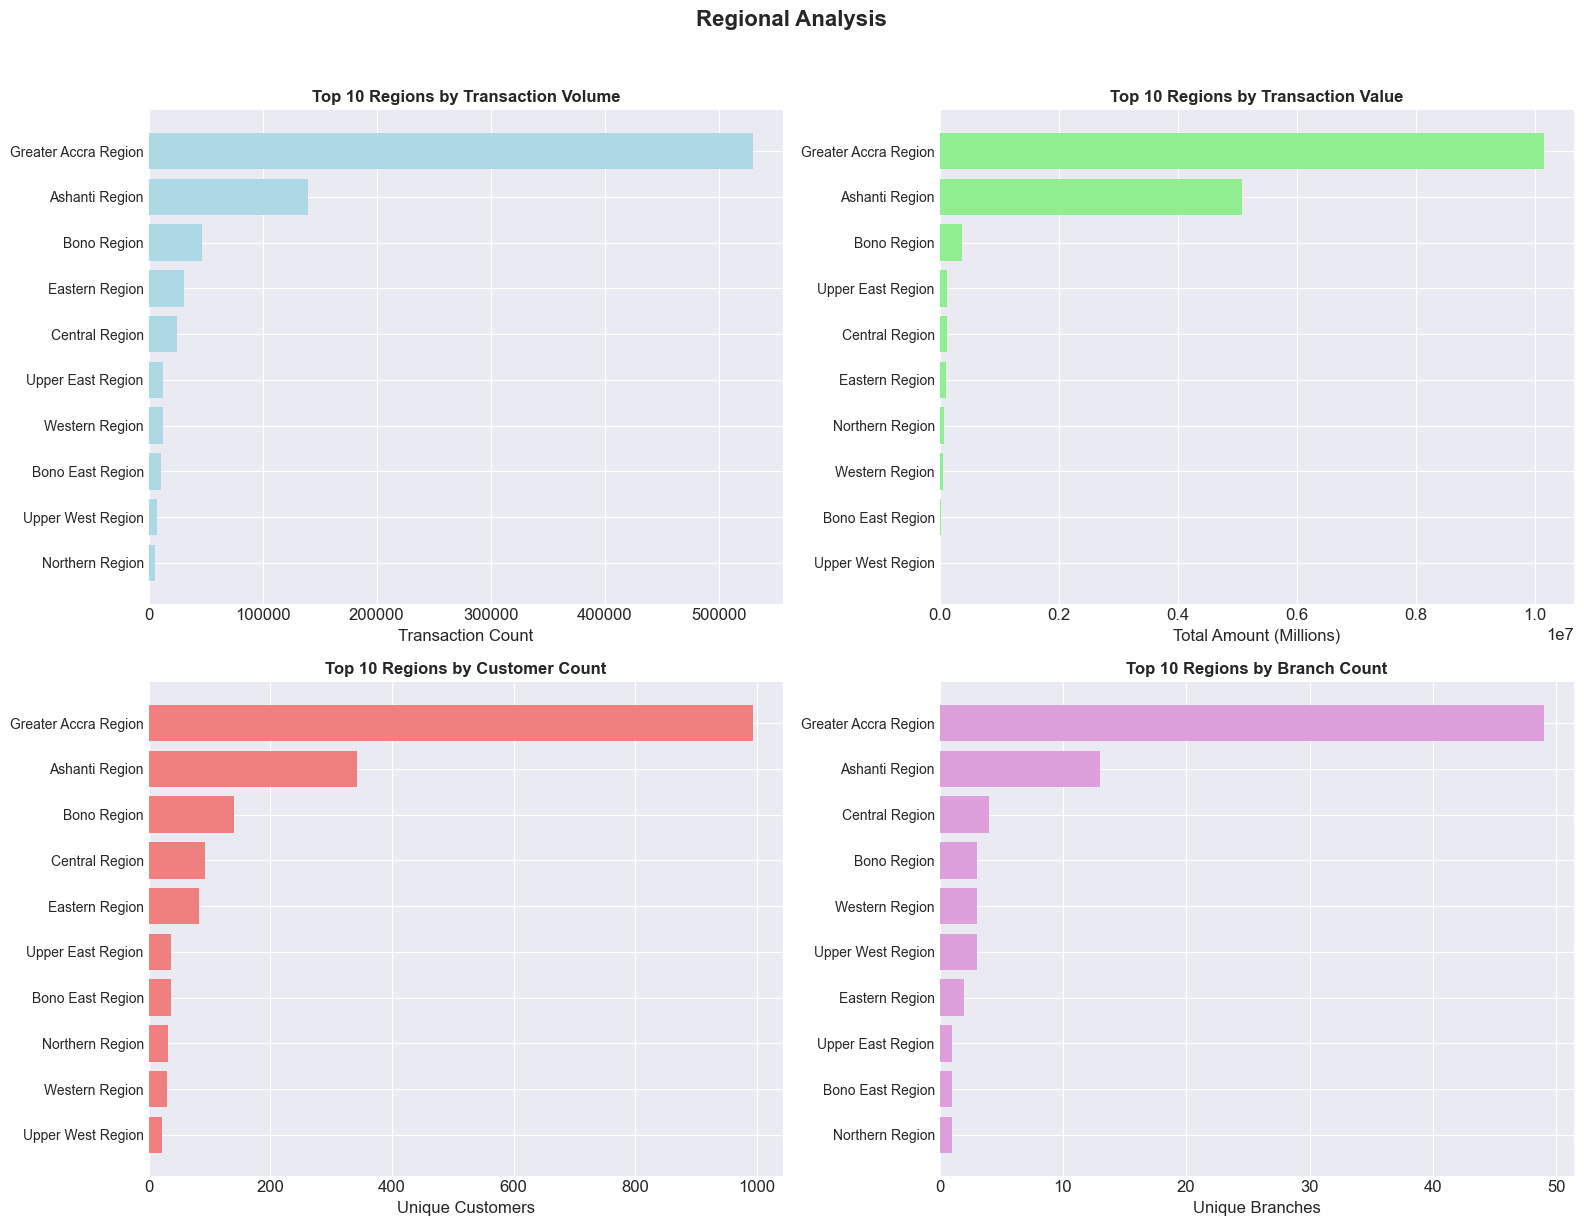

In [ ]:
# Regional analysis
if 'Region' in df.columns:
    regional_stats = df.groupby('Region').agg({
        'Transaction_Amount': ['count', 'sum', 'mean'],
        'Account_Number': 'nunique',
        'Customer_Branch_Code': 'nunique'
    }).round(2)
    
    regional_stats.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 
                             'Unique_Customers', 'Unique_Branches']
    regional_stats = regional_stats.sort_values('Transaction_Count', ascending=False)
    
    print(f"📊 Total unique regions: {len(regional_stats):,}")
    print("\n📋 Regional Statistics:")
    display(regional_stats)
    
    # Regional visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Transaction count by region
    top_regions = regional_stats.nlargest(10, 'Transaction_Count')
    axes[0,0].barh(range(len(top_regions)), top_regions['Transaction_Count'], color='lightblue')
    axes[0,0].set_yticks(range(len(top_regions)))
    axes[0,0].set_yticklabels(top_regions.index, fontsize=10)
    axes[0,0].set_xlabel('Transaction Count')
    axes[0,0].set_title('Top 10 Regions by Transaction Volume', fontsize=12, fontweight='bold')
    axes[0,0].invert_yaxis()
    
    # Total amount by region
    top_regions_amount = regional_stats.nlargest(10, 'Total_Amount')
    axes[0,1].barh(range(len(top_regions_amount)), top_regions_amount['Total_Amount'] / 1e6, color='lightgreen')
    axes[0,1].set_yticks(range(len(top_regions_amount)))
    axes[0,1].set_yticklabels(top_regions_amount.index, fontsize=10)
    axes[0,1].set_xlabel('Total Amount (Millions)')
    axes[0,1].set_title('Top 10 Regions by Transaction Value', fontsize=12, fontweight='bold')
    axes[0,1].invert_yaxis()
    
    # Customer count by region
    top_regions_customers = regional_stats.nlargest(10, 'Unique_Customers')
    axes[1,0].barh(range(len(top_regions_customers)), top_regions_customers['Unique_Customers'], color='lightcoral')
    axes[1,0].set_yticks(range(len(top_regions_customers)))
    axes[1,0].set_yticklabels(top_regions_customers.index, fontsize=10)
    axes[1,0].set_xlabel('Unique Customers')
    axes[1,0].set_title('Top 10 Regions by Customer Count', fontsize=12, fontweight='bold')
    axes[1,0].invert_yaxis()
    
    # Branch count by region
    top_regions_branches = regional_stats.nlargest(10, 'Unique_Branches')
    axes[1,1].barh(range(len(top_regions_branches)), top_regions_branches['Unique_Branches'], color='plum')
    axes[1,1].set_yticks(range(len(top_regions_branches)))
    axes[1,1].set_yticklabels(top_regions_branches.index, fontsize=10)
    axes[1,1].set_xlabel('Unique Branches')
    axes[1,1].set_title('Top 10 Regions by Branch Count', fontsize=12, fontweight='bold')
    axes[1,1].invert_yaxis()
    
    plt.suptitle('Regional Analysis', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

Temporal Analysis

⏰ TEMPORAL ANALYSIS


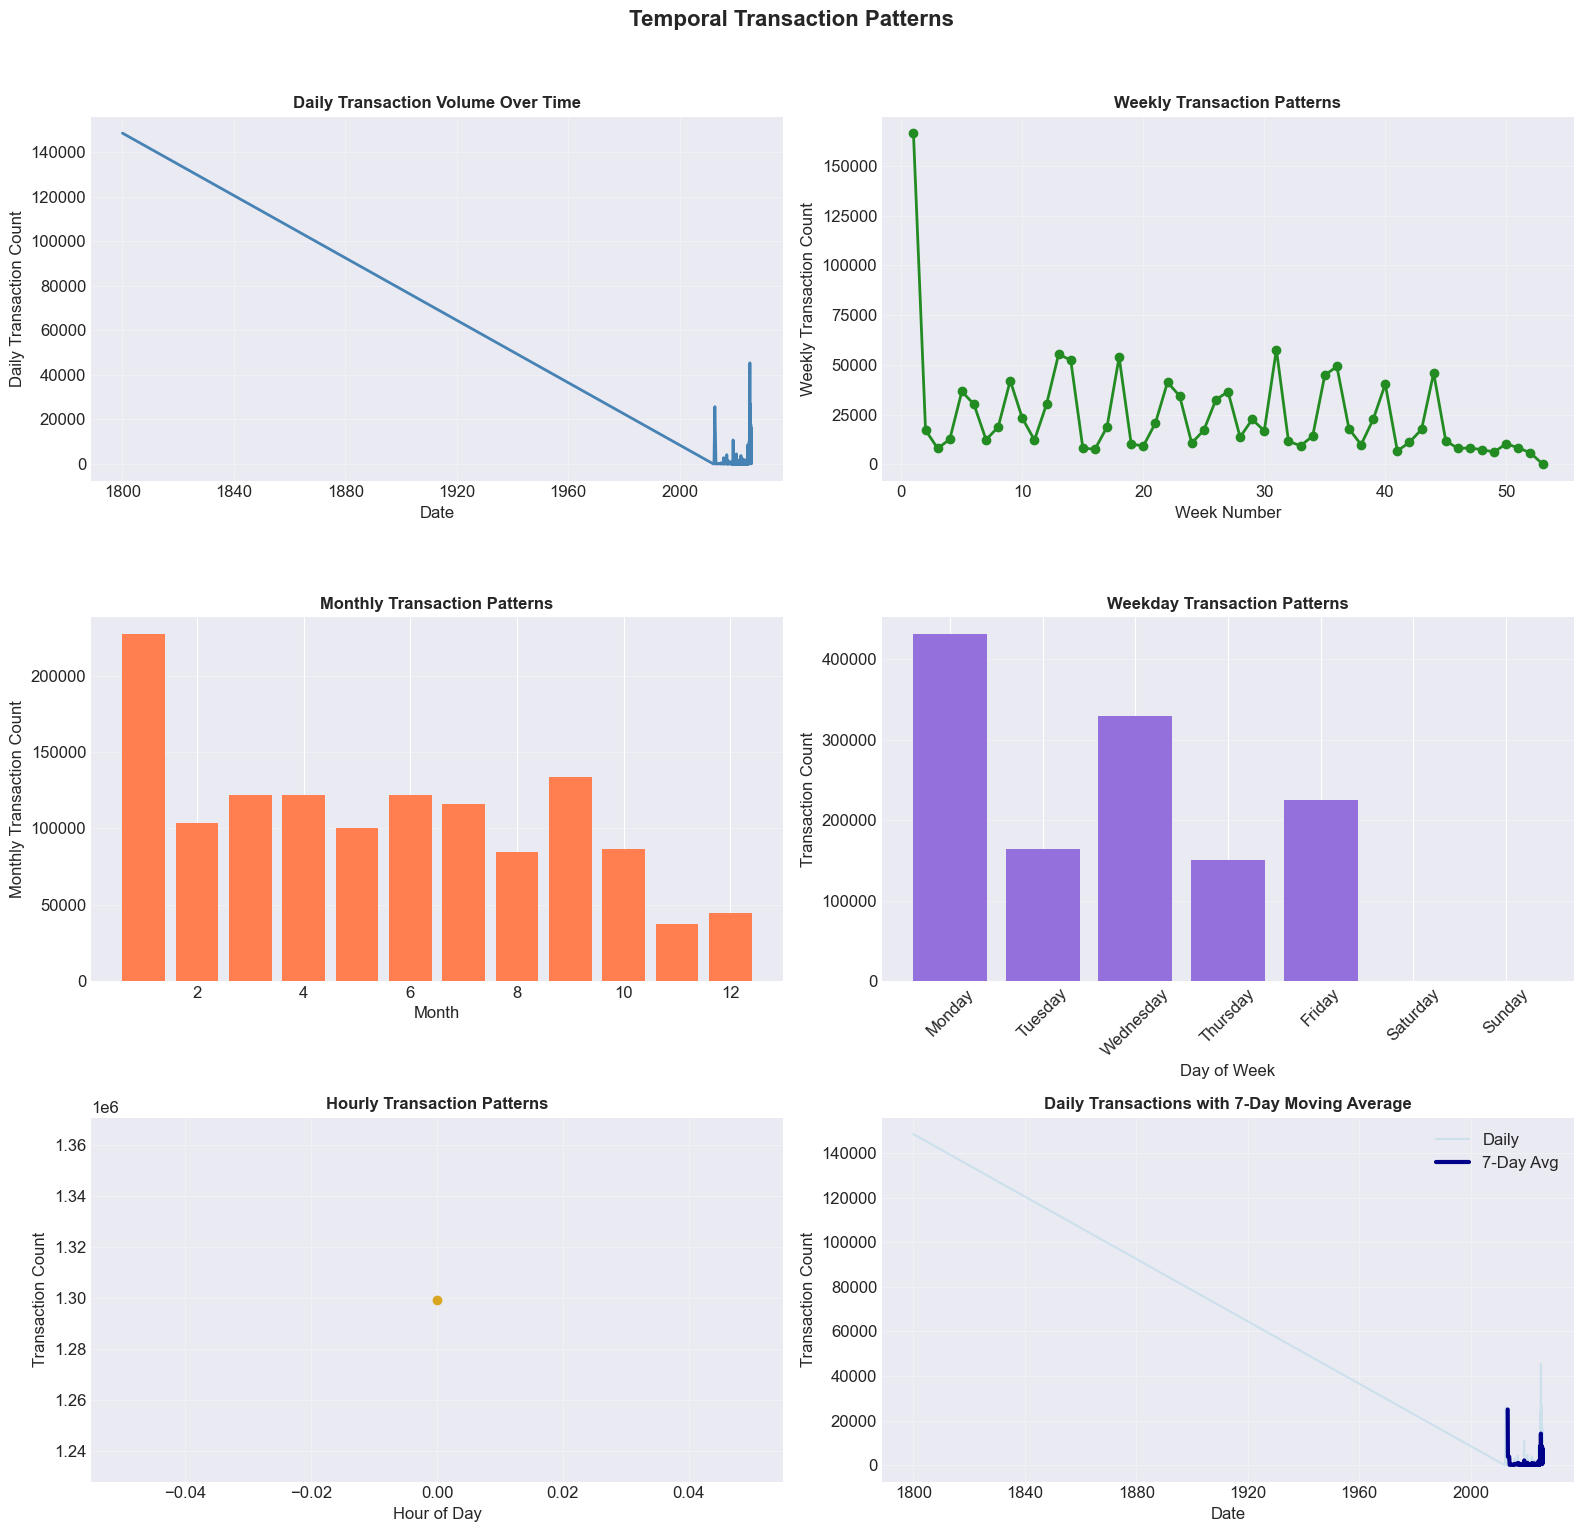

In [ ]:
print("⏰ TEMPORAL ANALYSIS")
print("="*60)

# Time-based analysis
if 'Transaction_Date' in df.columns:
    # Daily transaction patterns
    df['Transaction_Date_Only'] = df['Transaction_Date'].dt.date
    daily_stats = df.groupby('Transaction_Date_Only').agg({
        'Transaction_Amount': ['count', 'sum', 'mean'],
        'Account_Number': 'nunique'
    }).round(2)
    
    daily_stats.columns = ['Daily_Count', 'Daily_Total', 'Daily_Avg', 'Daily_Customers']
    
    # Weekly patterns
    df['Transaction_Week'] = df['Transaction_Date'].dt.isocalendar().week
    weekly_stats = df.groupby('Transaction_Week').agg({
        'Transaction_Amount': ['count', 'sum', 'mean']
    }).round(2)
    
    weekly_stats.columns = ['Weekly_Count', 'Weekly_Total', 'Weekly_Avg']
    
    # Monthly patterns
    monthly_stats = df.groupby('Transaction_Month').agg({
        'Transaction_Amount': ['count', 'sum', 'mean']
    }).round(2)
    
    monthly_stats.columns = ['Monthly_Count', 'Monthly_Total', 'Monthly_Avg']
    
    # Weekday patterns
    if 'Transaction_Weekday' in df.columns:
        weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        df['Transaction_Weekday'] = pd.Categorical(df['Transaction_Weekday'], categories=weekday_order, ordered=True)
        weekday_stats = df.groupby('Transaction_Weekday').agg({
            'Transaction_Amount': ['count', 'sum', 'mean']
        }).round(2)
        
        weekday_stats.columns = ['Weekday_Count', 'Weekday_Total', 'Weekday_Avg']
    
    # Hourly patterns
    if 'Transaction_Hour' in df.columns:
        hourly_stats = df.groupby('Transaction_Hour').agg({
            'Transaction_Amount': ['count', 'sum', 'mean']
        }).round(2)
        
        hourly_stats.columns = ['Hourly_Count', 'Hourly_Total', 'Hourly_Avg']

# Visualizations
fig, axes = plt.subplots(3, 2, figsize=(16, 15))
    
# Daily transaction count over time
axes[0,0].plot(daily_stats.index, daily_stats['Daily_Count'], linewidth=2, color='steelblue')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Daily Transaction Count')
axes[0,0].set_title('Daily Transaction Volume Over Time', fontsize=12, fontweight='bold')
axes[0,0].grid(alpha=0.3)
    
# Weekly patterns
axes[0,1].plot(weekly_stats.index, weekly_stats['Weekly_Count'], marker='o', linewidth=2, color='forestgreen')
axes[0,1].set_xlabel('Week Number')
axes[0,1].set_ylabel('Weekly Transaction Count')
axes[0,1].set_title('Weekly Transaction Patterns', fontsize=12, fontweight='bold')
axes[0,1].grid(alpha=0.3)
    
# Monthly patterns
axes[1,0].bar(monthly_stats.index, monthly_stats['Monthly_Count'], color='coral')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Monthly Transaction Count')
axes[1,0].set_title('Monthly Transaction Patterns', fontsize=12, fontweight='bold')
axes[1,0].grid(alpha=0.3, axis='y')
    
# Weekday patterns
if 'weekday_stats' in locals():
    axes[1,1].bar(range(len(weekday_stats)), weekday_stats['Weekday_Count'], color='mediumpurple')
    axes[1,1].set_xticks(range(len(weekday_stats)))
    axes[1,1].set_xticklabels(weekday_stats.index, rotation=45)
    axes[1,1].set_xlabel('Day of Week')
    axes[1,1].set_ylabel('Transaction Count')
    axes[1,1].set_title('Weekday Transaction Patterns', fontsize=12, fontweight='bold')
    axes[1,1].grid(alpha=0.3, axis='y')
    
# Hourly patterns
if 'hourly_stats' in locals():
    axes[2,0].plot(hourly_stats.index, hourly_stats['Hourly_Count'], marker='o', linewidth=2, color='goldenrod')
    axes[2,0].set_xlabel('Hour of Day')
    axes[2,0].set_ylabel('Transaction Count')
    axes[2,0].set_title('Hourly Transaction Patterns', fontsize=12, fontweight='bold')
    axes[2,0].grid(alpha=0.3)
    
# Moving average of daily transactions
if len(daily_stats) > 7:
    daily_stats['7day_avg'] = daily_stats['Daily_Count'].rolling(window=7).mean()
    axes[2,1].plot(daily_stats.index, daily_stats['Daily_Count'], alpha=0.5, label='Daily', color='lightblue')
    axes[2,1].plot(daily_stats.index, daily_stats['7day_avg'], linewidth=3, label='7-Day Avg', color='darkblue')
    axes[2,1].set_xlabel('Date')
    axes[2,1].set_ylabel('Transaction Count')
    axes[2,1].set_title('Daily Transactions with 7-Day Moving Average', fontsize=12, fontweight='bold')
    axes[2,1].legend()
    axes[2,1].grid(alpha=0.3)
    
plt.suptitle('Temporal Transaction Patterns', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Correlation Analysis

🔗 CORRELATION ANALYSIS


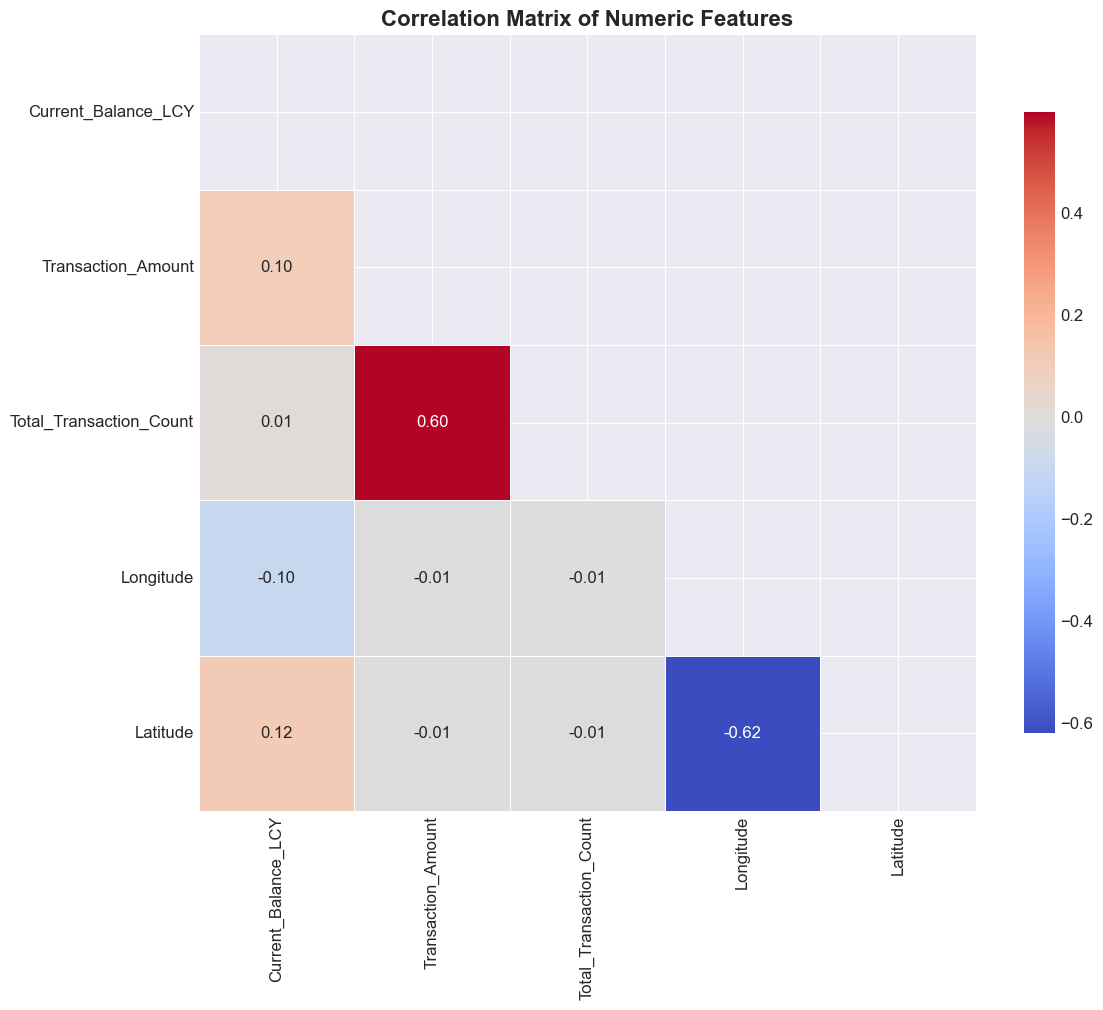


📊 Strong Correlations (|r| > 0.5):
  • Total_Transaction_Count ↔ Transaction_Amount: 0.599
  • Transaction_Amount ↔ Total_Transaction_Count: 0.599
  • Longitude ↔ Latitude: -0.620
  • Latitude ↔ Longitude: -0.620


In [ ]:
print("🔗 CORRELATION ANALYSIS")
print("="*60)

# Correlation matrix for numeric features
numeric_features = [col for col in numeric_cols if col not in ['Account_Number', 'Customer_Branch_Code']]

if len(numeric_features) > 1:
    correlation_matrix = df[numeric_features].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Identify strong correlations (absolute value > 0.5)
    strong_correlations = correlation_matrix.unstack().sort_values(ascending=False)
    strong_correlations = strong_correlations[(strong_correlations.abs() > 0.5) & (strong_correlations < 1)]
    
    print("\n📊 Strong Correlations (|r| > 0.5):")
    if len(strong_correlations) > 0:
        for (feat1, feat2), corr in strong_correlations.head(10).items():
            print(f"  • {feat1} ↔ {feat2}: {corr:.3f}")
    else:
        print("  No strong correlations found (|r| > 0.5)")

Data Quality Issues & Recommendations

In [ ]:
print("🚨 DATA QUALITY ISSUES & RECOMMENDATIONS")
print("="*60)

# Generate data quality report
quality_report = []

# Check for missing values
missing_cols = missing_data[missing_data['Missing_Percentage'] > 0]
if len(missing_cols) > 0:
    quality_report.append({
        'Issue': 'Missing Values',
        'Severity': 'HIGH' if missing_cols['Missing_Percentage'].max() > 20 else 'MEDIUM',
        'Description': f'{len(missing_cols)} columns have missing values',
        'Recommendation': 'Consider imputation or removal based on business rules'
    })

# Check for duplicate records
if df.duplicated().sum() > 0:
    quality_report.append({
        'Issue': 'Duplicate Records',
        'Severity': 'MEDIUM',
        'Description': f'{df.duplicated().sum():,} duplicate records found',
        'Recommendation': 'Investigate if duplicates are valid or need removal'
    })

# Check for outliers in transaction amounts
if 'Transaction_Amount' in df.columns:
    q1 = df['Transaction_Amount'].quantile(0.25)
    q3 = df['Transaction_Amount'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df['Transaction_Amount'] < lower_bound) | (df['Transaction_Amount'] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100
    
    if outlier_pct > 5:
        quality_report.append({
            'Issue': 'Transaction Amount Outliers',
            'Severity': 'MEDIUM',
            'Description': f'{outlier_pct:.1f}% of transactions are outliers',
            'Recommendation': 'Review large transactions for fraud detection'
        })

# Check for invalid dates
if 'Transaction_Date' in df.columns:
    invalid_dates = df['Transaction_Date'].isnull().sum()
    if invalid_dates > 0:
        quality_report.append({
            'Issue': 'Invalid Dates',
            'Severity': 'HIGH',
            'Description': f'{invalid_dates} records have invalid dates',
            'Recommendation': 'Fix date parsing or remove invalid records'
        })

# Check for zero or negative balances/amounts if relevant
if 'Current_Balance_LCY' in df.columns:
    negative_balances = (df['Current_Balance_LCY'] < 0).sum()
    if negative_balances > 0:
        quality_report.append({
            'Issue': 'Negative Balances',
            'Severity': 'HIGH',
            'Description': f'{negative_balances} accounts have negative balances',
            'Recommendation': 'Investigate overdraft accounts'
        })

if 'Transaction_Amount' in df.columns:
    zero_amounts = (df['Transaction_Amount'] == 0).sum()
    if zero_amounts > 0:
        quality_report.append({
            'Issue': 'Zero Amount Transactions',
            'Severity': 'LOW',
            'Description': f'{zero_amounts} transactions have zero amount',
            'Recommendation': 'Review if these are valid (fees, reversals)'
        })

# Display quality report
quality_df = pd.DataFrame(quality_report)
if len(quality_df) > 0:
    display(quality_df.style.apply(lambda x: ['background: lightcoral' if x['Severity'] == 'HIGH' 
                                            else 'background: lightyellow' if x['Severity'] == 'MEDIUM'
                                            else 'background: lightgreen' for i in x], axis=1))
else:
    print("✅ No major data quality issues found!")

🚨 DATA QUALITY ISSUES & RECOMMENDATIONS


,Issue,Severity,Description,Recommendation
0,Missing Values,HIGH,9 columns have missing values,Consider imputation or removal based on business rules
1,Duplicate Records,MEDIUM,"498,433 duplicate records found",Investigate if duplicates are valid or need removal
2,Transaction Amount Outliers,MEDIUM,18.5% of transactions are outliers,Review large transactions for fraud detection
3,Zero Amount Transactions,LOW,929 transactions have zero amount,"Review if these are valid (fees, reversals)"


Key Insights Summary

In [ ]:
print("🎯 KEY INSIGHTS SUMMARY")
print("="*60)

# Generate key insights
insights = []

# Basic statistics
insights.append(f"📈 **Dataset Size**: {df.shape[0]:,} transactions, {df.shape[1]} features")

# Customer insights
if 'Account_Number' in df.columns:
    unique_customers = df['Account_Number'].nunique()
    avg_txn_per_customer = df.shape[0] / unique_customers if unique_customers > 0 else 0
    insights.append(f"👥 **Unique Customers**: {unique_customers:,} (Avg {avg_txn_per_customer:.1f} txn/customer)")

# Transaction insights
if 'Transaction_Amount' in df.columns:
    total_amount = df['Transaction_Amount'].sum()
    avg_amount = df['Transaction_Amount'].mean()
    insights.append(f"💰 **Transaction Value**: Total ${total_amount:,.0f} (Avg ${avg_amount:,.0f}/txn)")

# Channel insights
if 'Transaction_Channel_Name' in df.columns:
    top_channel = df['Transaction_Channel_Name'].mode().iloc[0] if not df['Transaction_Channel_Name'].mode().empty else 'N/A'
    top_channel_pct = (df['Transaction_Channel_Name'] == top_channel).mean() * 100
    insights.append(f"🏦 **Top Channel**: {top_channel} ({top_channel_pct:.1f}% of transactions)")

# Regional insights
if 'Region' in df.columns:
    top_region = df['Region'].mode().iloc[0] if not df['Region'].mode().empty else 'N/A'
    top_region_pct = (df['Region'] == top_region).mean() * 100
    insights.append(f"🌍 **Top Region**: {top_region} ({top_region_pct:.1f}% of transactions)")

# Debit/Credit insights
if 'Debit_Credit_Flag' in df.columns:
    debit_pct = (df['Debit_Credit_Flag'] == 'D').mean() * 100 if 'D' in df['Debit_Credit_Flag'].values else 0
    credit_pct = (df['Debit_Credit_Flag'] == 'C').mean() * 100 if 'C' in df['Debit_Credit_Flag'].values else 0
    insights.append(f"⚖️ **Transaction Mix**: Debit {debit_pct:.1f}%, Credit {credit_pct:.1f}%")

# Temporal insights
if 'Transaction_Date' in df.columns:
    date_range = df['Transaction_Date'].max() - df['Transaction_Date'].min()
    insights.append(f"📅 **Time Period**: {date_range.days} days of data")

# Data quality insights
missing_pct = df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100
insights.append(f"✅ **Data Quality**: {missing_pct:.2f}% missing values overall")

# Display insights
print("\n".join(insights))

🎯 KEY INSIGHTS SUMMARY
📈 **Dataset Size**: 1,304,801 transactions, 26 features
👥 **Unique Customers**: 3,893 (Avg 335.2 txn/customer)
💰 **Transaction Value**: Total $19,142,238,375,104 (Avg $14,731,847/txn)
🏦 **Top Channel**: SYSTEM (41.7% of transactions)
🌍 **Top Region**: Greater Accra Region (40.8% of transactions)
⚖️ **Transaction Mix**: Debit 0.0%, Credit 0.0%
📅 **Time Period**: 82486 days of data
✅ **Data Quality**: 7.07% missing values overall


Export Cleaned Data & Summary

In [ ]:
print("💾 EXPORTING RESULTS")
print("="*60)

# Create output directory if it doesn't exist
import os
output_dir = '../data/outputs'
os.makedirs(output_dir, exist_ok=True)

# Export cleaned data
output_path = f'{output_dir}/cleaned_exploration_data.csv'
df.to_csv(output_path, index=False)
print(f"✅ Cleaned data exported to: {output_path}")

💾 EXPORTING RESULTS
✅ Cleaned data exported to: ../data/outputs/cleaned_exploration_data.csv


In [ ]:
# Export summary statistics
summary_stats = {
    'total_records': len(df),
    'total_columns': len(df.columns),
    'unique_customers': df['Account_Number'].nunique() if 'Account_Number' in df.columns else 0,
    'unique_branches': df['Customer_Branch_Code'].nunique() if 'Customer_Branch_Code' in df.columns else 0,
    'total_transaction_amount': df['Transaction_Amount'].sum() if 'Transaction_Amount' in df.columns else 0,
    'avg_transaction_amount': df['Transaction_Amount'].mean() if 'Transaction_Amount' in df.columns else 0,
    'data_start_date': df['Transaction_Date'].min() if 'Transaction_Date' in df.columns else 'N/A',
    'data_end_date': df['Transaction_Date'].max() if 'Transaction_Date' in df.columns else 'N/A',
    'missing_values_pct': df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100
}

summary_df = pd.DataFrame(list(summary_stats.items()), columns=['Metric', 'Value'])
summary_path = f'{output_dir}/exploration_summary.csv'
summary_df.to_csv(summary_path, index=False)
print(f"✅ Summary statistics exported to: {summary_path}")

✅ Summary statistics exported to: ../data/outputs/exploration_summary.csv


In [ ]:
# Export quality report
if 'quality_df' in locals() and len(quality_df) > 0:
    quality_path = f'{output_dir}/data_quality_report.csv'
    quality_df.to_csv(quality_path, index=False)
    print(f"✅ Data quality report exported to: {quality_path}")

print("\n" + "="*60)
print("🎉 DATA EXPLORATION COMPLETE!")
print("="*60)
print("\nProceed to 02_feature_engineering.ipynb for the next step.")

✅ Data quality report exported to: ../data/outputs/data_quality_report.csv

🎉 DATA EXPLORATION COMPLETE!

Proceed to 02_feature_engineering.ipynb for the next step.
